1. Download the data file above and read it into a pandas DataFrame.
2. Add the code necessary to describe the dataset
3. Using markdown commentary describe the dataset 
4. Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing, why you are doing it and the results of each analysis
5. Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model and display the output from the model
6. In addition to the model output include markdown commentary about the important statistics from the output; is taxes a good predictor for selling price? Why or why not?
7. Repeat this procedure using one of the other variables as the independent variable. Which model is "better"? What are some limitations of the model? 


In [2]:
#1 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/homes.csv')
df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1,175,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2,129,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3,138,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4,232,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0


In [3]:
#2
df.describe()

,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


#3 commentary about the dataset

# Based on the summary statistics, the dataset includes 51 records with variables such selling price, listing price,living area, rooms, beds, baths, age, acres, and taxes. Most variables have 50 valid entries, indicating one row with missing data. The selling prices are vary, suggesting a diverse set of home. The average home has about 8 rooms, 4 bedrooms, and 2 bathrooms, with an average age of 36 years. Taxes and lot sizes (Acres) also vary, reflecting a mix of property types and values.


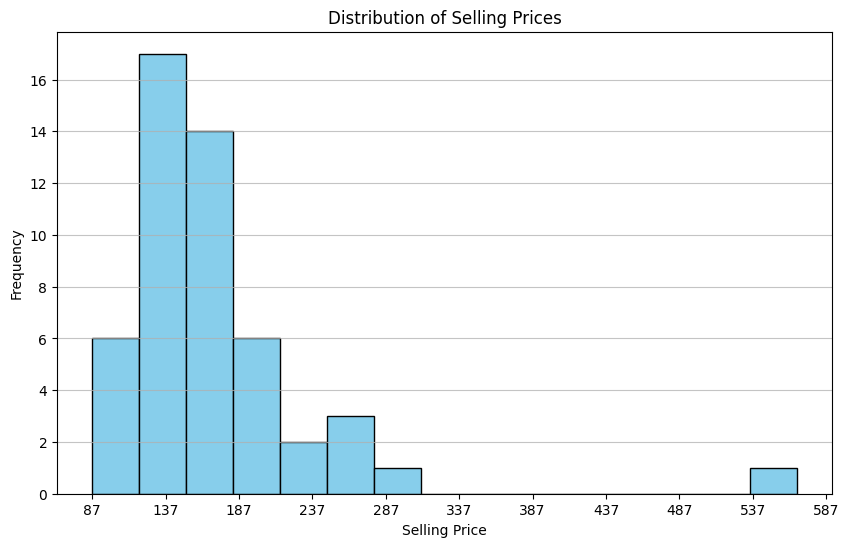

In [ ]:
#4 Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing, why you are doing it and the results of each analysis
#EDA 1: Distribution of Selling Prices
sell_numeric = pd.to_numeric(df['Sell'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.hist(sell_numeric.dropna(), bins=15, color='skyblue', edgecolor='black')
# dropna() is used to remove any NaN values from the sell_numeric series before plotting
# This ensures that the histogram only includes valid numeric selling prices, preventing errors or misleading results due to missing data.
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.xticks(np.arange(int(sell_numeric.min()), int(sell_numeric.max())+50, 50))
plt.grid(axis='y', alpha=0.75)
plt.show()

# We are plotting the distribution of selling prices to understand the overall range and frequency of home prices in the dataset. 
# This helps us identify common price ranges, spot outliers, and get a sense of the market's diversity since looking at the histogram is a fundamental step in EDA because it informs us about the central tendency, spread. 

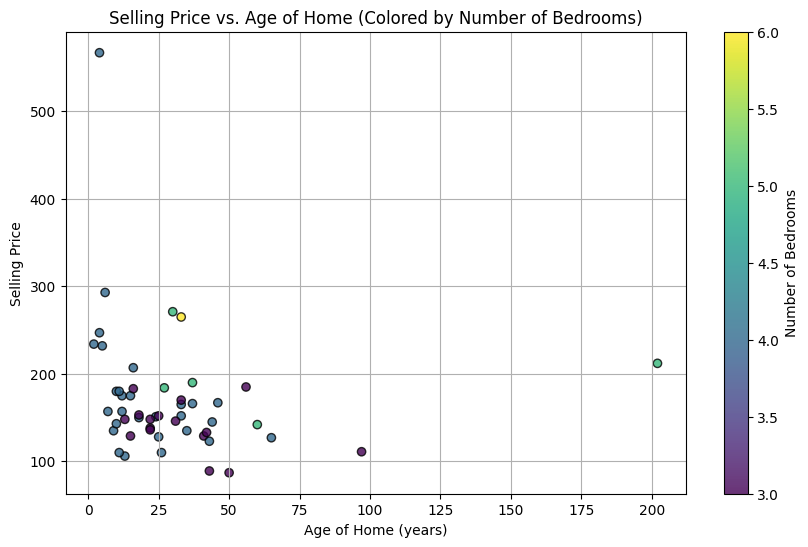

In [63]:
# EDA 2: Relationship between Selling Price and Age of Home (color by number of bedrooms)
age_numeric = pd.to_numeric(df['Age'], errors='coerce')
beds_numeric = pd.to_numeric(df['Beds'], errors='coerce')
plt.figure(figsize=(10, 6))
scatter = plt.scatter(age_numeric, sell_numeric, c=beds_numeric, cmap='viridis', alpha=0.8, edgecolor='k')
plt.title('Selling Price vs. Age of Home (Colored by Number of Bedrooms)')
plt.xlabel('Age of Home (years)')
plt.ylabel('Selling Price')
cbar = plt.colorbar(scatter)
cbar.set_label('Number of Bedrooms')
plt.grid(True)
plt.show()

# We are creating this scatter plot to explore the relationship between the age of a home and its selling price, while also considering the number of bedrooms (shown by color). 
# This helps us visually identify patterns or trends, such as whether newer homes generally sell for more, or if the number of bedrooms affects the price regardless of age.
# By adding color for bedrooms, we can see if homes with more bedrooms tend to sell for higher prices at any given age, or if age is a stronger factor.

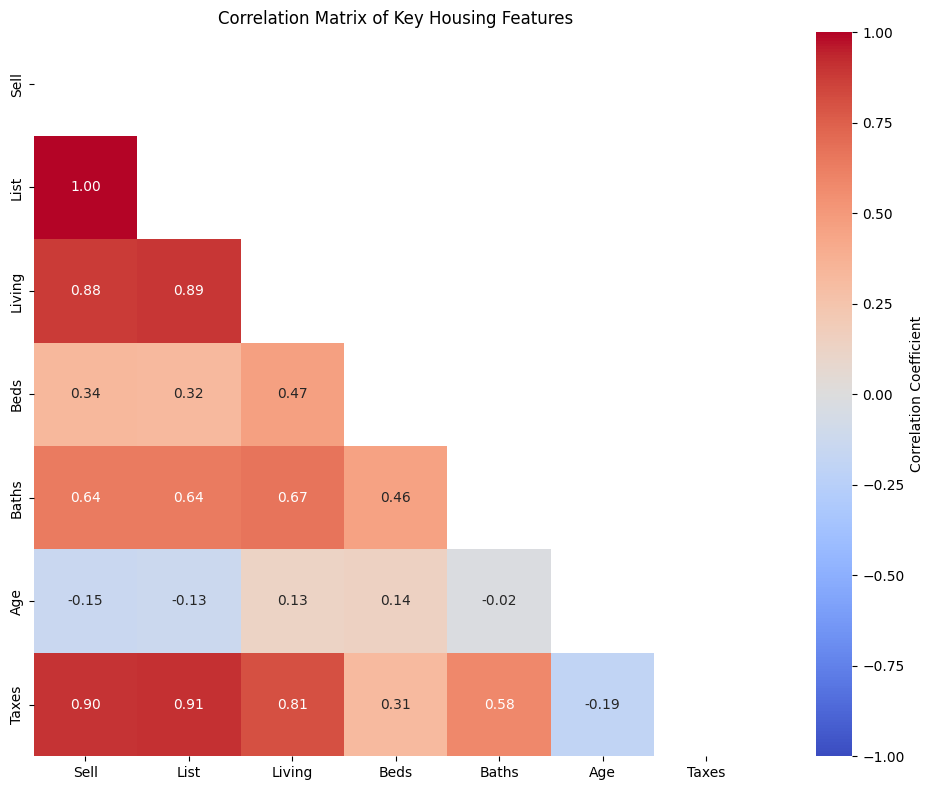

In [ ]:
# EDA 3: Correlation Matrix
import seaborn as sb
# Select only the most relevant columns for home price analysis
cols_of_interest = ['Sell', 'List', 'Living', 'Beds', 'Baths', 'Age', 'Taxes']
numeric_df = df[cols_of_interest].apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Create heatmap 
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  
sb.heatmap(corr_matrix, 
          mask=mask,
          annot=True, 
          fmt=".2f", 
          cmap='coolwarm',
          center=0,
          vmin=-1, 
          vmax=1,
          square=True,
          cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Key Housing Features')
plt.tight_layout()
plt.show()


# The correlation matrix heatmap provides a visual representation of the relationships between key housing features.
# More specifically:
# 1. Strong Positive Correlation: The 'Sell' and 'List' show a very strong positive correlation (close to 1), indicating that homes listed at higher prices tend to sell for higher prices as well.
# 2. Moderate Correlations: Features like 'Living' area and 'Beds' also show moderate positive correlations with 'Sell' price, suggesting that larger homes with more bedrooms tend to have higher selling prices.
# 3. Negative Correlation: The 'Age' of the home has a slight negative correlation with 'Sell' price, indicating that older homes may sell for less, although this relationship is not very strong.
# 4. Taxes: The 'Taxes' variable shows a moderate positive correlation with 'Sell' price, suggesting that homes with higher property taxes tend to have higher selling prices, possibly reflecting their overall value.

In [66]:
#5 Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model and display the output from the model
import statsmodels.api as sm
# Prepare the data
X = pd.to_numeric(df['Taxes'], errors='coerce')
y = pd.to_numeric(df['Sell'], errors='coerce')
# Drop rows with NaN values in either X or y
data = pd.DataFrame({'Taxes': X, 'Sell': y}).dropna()
X = data['Taxes']
y = data['Sell']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)  # Make predictions
print(model.summary())



                                 OLS Regression Results                                
Dep. Variable:                   Sell   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1571.
Date:                Sat, 11 Oct 2025   Prob (F-statistic):                    6.90e-39
Time:                        15:58:21   Log-Likelihood:                         -244.50
No. Observations:                  50   AIC:                                      491.0
Df Residuals:                      49   BIC:                                      492.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [65]:
p_val = model.pvalues
# Print p-value for Taxes in standard decimal notation (not scientific)
print(f"P-value for Taxes: {p_val['Taxes']:.2f}")


P-value for Taxes: 0.00


# Q6 
Based on the regression output, looking at key statistics:

1. The R-squared value is 0.97 (97%) and also the adjusted R square is quite identical, indicating that taxes explain approximately 97% of the variance in selling prices. This is a relatively strong relationship.

2. The p-value for the taxes coefficient is extremely small (< 0.001), suggesting the relationship between taxes and selling price is statistically significant.

3. The coefficient estimate shows that for every one-unit increase in taxes, the selling price increases by about 0.045 units.

4. The F-statistic is also significant (p < 0.001), indicating the model as a whole is statistically significant.

Therefore, taxes appear to be a good predictor for selling price in this dataset, explaining a large portion of the variance and showing a statistically significant relationship. However, there's still about 19% of the variance unexplained, suggesting other factors also influence home prices.


In [69]:
#7 Repeat this procedure using one of the other variables as the independent variable. Which model is "better"? What are some limitations of the model? We will use Baths as the independent variable.
X2 = pd.to_numeric(df['Baths'], errors='coerce')
y2 = pd.to_numeric(df['Sell'], errors='coerce')
# Drop rows with NaN values in either X2 or y2
data2 = pd.DataFrame({'Baths': X2, 'Sell': y2}).dropna()
X2 = data2['Baths']
y2 = data2['Sell']
model2 = sm.OLS(y2, X2).fit()
predictions2 = model2.predict(X2)  # Make predictions
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Sell   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              430.4
Date:                Sat, 11 Oct 2025   Prob (F-statistic):                    6.45e-26
Time:                        15:58:42   Log-Likelihood:                         -274.94
No. Observations:                  50   AIC:                                      551.9
Df Residuals:                      49   BIC:                                      553.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [70]:
p_val2= model2.pvalues
# Print p-value for Living in standard decimal notation (not scientific)
print(f"P-value for Baths: {p_val2['Baths']:.10f}")


P-value for Baths: 0.0000000000


# Based on the R-squared values and p-values from both models, we can compare their performance. The 1st model with 'Taxes' as the independent variable has a slighly higher R-squared value, indicating it explains more variance in selling prices compared to the model using 'Baths'. This suggests that Taxes is a better predictor of selling price than Bathroom in this dataset. However, limitations of both models include the assumption of linearity, potential omitted variable bias (other important factors affecting selling price may not be included), and the relatively small sample size, which may affect the generalizability of the results. This comparision helps us visually identify patterns or trends, such as whether newer homes generally sell for more, or if the number of bedrooms affects the price regardless of age.